# JAX Line Profile Examples
This notebook demonstrates Gaussian, Lorentzian, and Voigt absorption line profiles
implemented in a fully JIT-compatible way with JAX.

In [4]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from spice.spectrum.line_profile import line_profile, get_line_profile_id

import matplotlib
%matplotlib inline

In [2]:
wavelengths = jnp.linspace(5000 - 3, 5000 + 3, 1000)
center = 5000.0
sigma = 0.5
depth = 0.8
gamma = 0.2

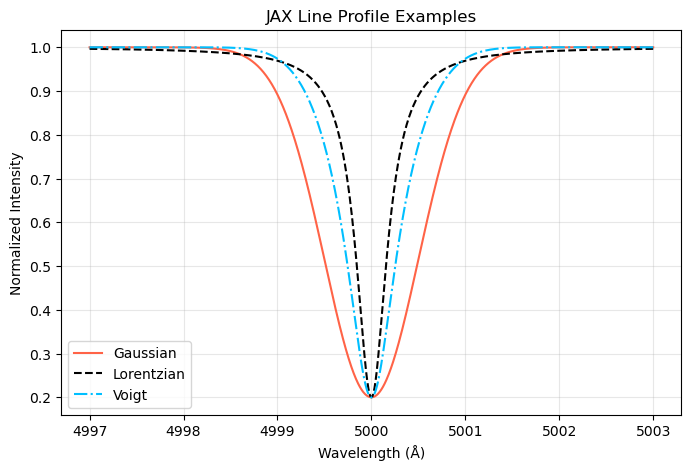

In [12]:
profiles = {
    k: line_profile(wavelengths, center, sigma, depth, get_line_profile_id(k), gamma)
    for k in ["gaussian", "lorentzian", "voigt"]
}

colors = ["tomato", "black", "deepskyblue"]
linestyles = ["-", "--", "-."]

plt.figure(figsize=(8, 5))
for i, (k, p) in enumerate(profiles.items()):
    plt.plot(wavelengths, p, label=k.title(), color=colors[i], linestyle=linestyles[i])
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Intensity")
plt.title("JAX Line Profile Examples")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

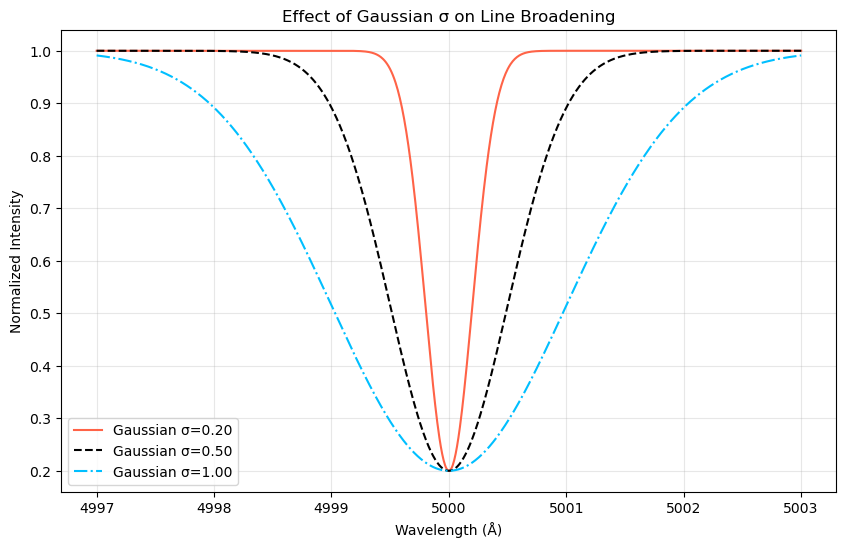

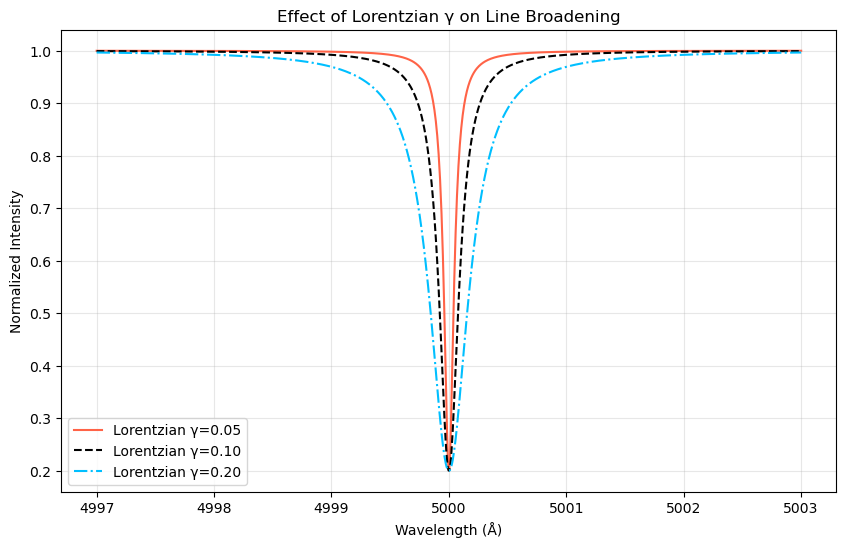

In [13]:
sigmas = [0.2, 0.5, 1.0]
gammas = [0.05, 0.1, 0.2]

plt.figure(figsize=(10, 6))
for i, s in enumerate(sigmas):
    p = line_profile(wavelengths, center, s, depth, get_line_profile_id("gaussian"), gamma)
    plt.plot(wavelengths, p, label=f"Gaussian σ={s:.2f}", color=colors[i], linestyle=linestyles[i])
plt.legend()
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Intensity")
plt.title("Effect of Gaussian σ on Line Broadening")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
for i, g in enumerate(gammas):
    p = line_profile(wavelengths, center, sigma, depth, get_line_profile_id("lorentzian"), g)
    plt.plot(wavelengths, p, label=f"Lorentzian γ={g:.2f}", color=colors[i], linestyle=linestyles[i])
plt.legend()
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Intensity")
plt.title("Effect of Lorentzian γ on Line Broadening")
plt.grid(alpha=0.3)
plt.show()

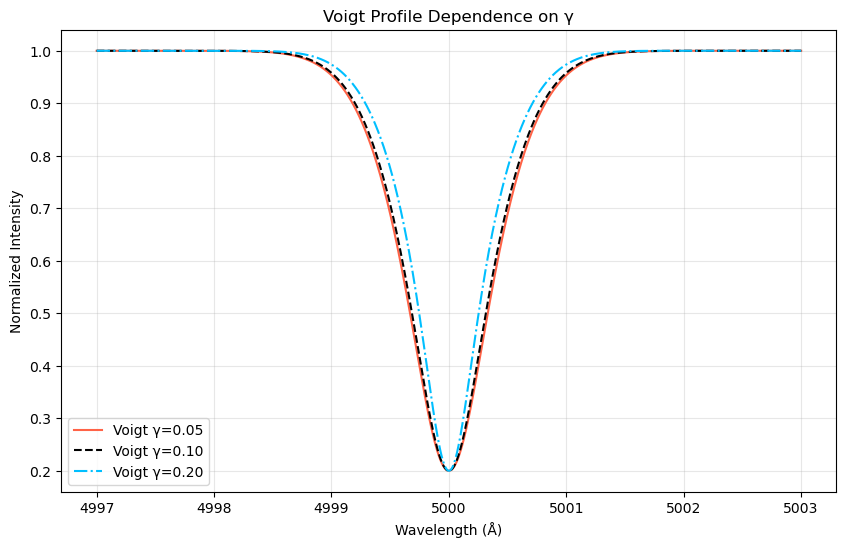

In [14]:
plt.figure(figsize=(10, 6))
for i, g in enumerate(gammas):
    p = line_profile(wavelengths, center, sigma, depth, get_line_profile_id("voigt"), g)
    plt.plot(wavelengths, p, label=f"Voigt γ={g:.2f}", color=colors[i], linestyle=linestyles[i])
plt.legend()
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Intensity")
plt.title("Voigt Profile Dependence on γ")
plt.grid(alpha=0.3)
plt.show()